In [1]:
import pandas as pd
import numpy as np

In [2]:
df_bowl=pd.read_csv("/home/jeevan/Desktop/IPL/Bowling data/bowl.csv")
df_bat=pd.read_csv("/home/jeevan/Desktop/IPL/Batting data/bat.csv")
match_no=np.load("IPL_2008-2019_match_ids.npy")
matches=pd.read_csv("/home/jeevan/Desktop/IPL/ipldata/matches.csv")

In [3]:
df = pd.DataFrame(columns=['t1_5bo_a', 't1_4bo_a', 't1_3bo_a'])

In [4]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [5]:
matches.keys()

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [6]:
(matches["team1"].unique())

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

We have 15 teams participating in the IPL, But not all are regular. 
We now remove tied matches and no result matches as they do not contribute to the output prediction.

Also, we have 3 dataset: Matches, Batsman, Bowlers
From this we construct 2 different model classes.
1)Team data only
2)Player and Team data

In [7]:
matches[pd.isnull(matches['winner'])]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
300,301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker,NaN
545,546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak,NaN
570,571,2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan,NaN
744,11340,2019,Bengaluru,30/04/19,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M. Chinnaswamy Stadium,Nigel Llong,Ulhas Gandhe,Anil Chaudhary


In [8]:
matches['winner'].fillna('Draw', inplace=True)

In [9]:
matches.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Delhi Capitals','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Rising Pune Supergiant','Kochi Tuskers Kerala','Pune Warriors']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','DD','GL','KXIP','SRH','RPS','RPS','KTK','PW'],inplace=True)

encode = {'team1': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13},
          'team2': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13},
          'toss_winner': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13},
          'winner': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13,'Draw':14}}
matches.replace(encode, inplace=True)
matches.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,10,3,3,field,normal,0,10,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,1,11,11,field,normal,0,11,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN


In [10]:
(matches["team1"].unique())

array([10,  1,  8, 11,  3,  2,  7,  9,  5,  6,  4, 12, 13])

In [11]:
matches[pd.isnull(matches['city'])]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
461,462,2014,NaN,2014-04-19,1,3,3,field,normal,0,3,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary,NaN
462,463,2014,NaN,2014-04-19,2,7,2,bat,normal,0,7,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni,NaN
466,467,2014,NaN,2014-04-23,5,6,6,field,normal,0,5,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth,NaN
468,469,2014,NaN,2014-04-25,10,7,10,bat,normal,0,10,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi,NaN
469,470,2014,NaN,2014-04-25,1,5,1,bat,normal,0,5,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus,NaN
474,475,2014,NaN,2014-04-28,3,9,9,field,normal,0,9,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi,NaN
476,477,2014,NaN,2014-04-30,10,1,1,field,normal,0,10,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus,NaN


In [12]:
matches['city'].fillna('Dubai',inplace=True)
matches.describe()

,id,season,team1,team2,toss_winner,dl_applied,winner,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,5.498677,5.511905,5.370370,0.025132,5.318783,13.283069,3.350529
std,3464.478148,3.366895,3.307026,3.274807,3.218386,0.156630,3.264940,23.471144,3.387963
min,1.000000,2008.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,189.750000,2011.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,0.000000
50%,378.500000,2013.000000,5.000000,5.000000,5.000000,0.000000,5.000000,0.000000,4.000000
75%,567.250000,2016.000000,9.000000,8.000000,7.000000,0.000000,8.000000,19.000000,6.000000
max,11415.000000,2019.000000,13.000000,13.000000,13.000000,1.000000,14.000000,146.000000,10.000000


In [13]:
dicVal = encode['winner']
print(dicVal['MI']) #key value
print(list(dicVal.keys())[list(dicVal.values()).index(1)]) #find key by value search 

1
MI


In [14]:
matches.keys()

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [15]:
matches = matches[['team1','team2','city','toss_decision','toss_winner','venue','winner']]

In [16]:
matches.head(2)

,team1,team2,city,toss_decision,toss_winner,venue,winner
0,10,3,Hyderabad,field,3,"Rajiv Gandhi International Stadium, Uppal",10
1,1,11,Pune,field,11,Maharashtra Cricket Association Stadium,11


In [17]:
df = pd.DataFrame(matches)
df.describe()

,team1,team2,toss_winner,winner
count,756.000000,756.000000,756.000000,756.000000
mean,5.498677,5.511905,5.370370,5.318783
std,3.307026,3.274807,3.218386,3.264940
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,2.000000,2.000000
50%,5.000000,5.000000,5.000000,5.000000
75%,9.000000,8.000000,7.000000,8.000000
max,13.000000,13.000000,13.000000,14.000000


In [18]:
temp1=df['toss_winner'].value_counts(sort=True)
temp2=df['winner'].value_counts(sort=True)
#Mumbai won most toss and also most matches
print('No of toss winners by each team')
for idx, val in temp1.iteritems():
   print('{} -> {}'.format(list(dicVal.keys())[list(dicVal.values()).index(idx)],val))
print('No of match winners by each team')
for idx, val in temp2.iteritems():
   print('{} -> {}'.format(list(dicVal.keys())[list(dicVal.values()).index(idx)],val))

No of toss winners by each team
MI -> 98
KKR -> 92
DD -> 90
CSK -> 89
KXIP -> 81
RCB -> 81
RR -> 80
SRH -> 46
DC -> 43
PW -> 20
GL -> 15
RPS -> 13
KTK -> 8
No of match winners by each team
MI -> 109
CSK -> 100
KKR -> 92
RCB -> 84
KXIP -> 82
DD -> 77
RR -> 75
SRH -> 58
DC -> 29
RPS -> 15
GL -> 13
PW -> 12
KTK -> 6
Draw -> 4


In [19]:
(matches["winner"].unique())

array([10, 11,  2,  9,  3,  1,  7,  8,  5,  6,  4, 13, 12, 14])

In [20]:
#shows that Mumbai won most matches followed by Chennai
df['winner'].hist(bins=40)

Text(0.5,1,'Match winners')

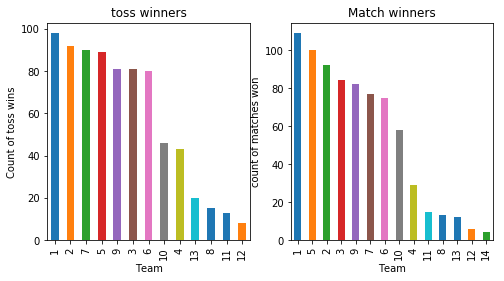

In [21]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Team')
ax1.set_ylabel('Count of toss wins')
ax1.set_title("toss winners")
temp1.plot(kind='bar')

ax2 = fig.add_subplot(122)
temp2.plot(kind = 'bar')
ax2.set_xlabel('Team')
ax2.set_ylabel('count of matches won')
ax2.set_title("Match winners")



In [22]:
 df.apply(lambda x: sum(x.isnull()),axis=0) 
    #find the null values in every column

team1            0
team2            0
city             0
toss_decision    0
toss_winner      0
venue            0
winner           0
dtype: int64

In [23]:
#Find cities which are null
df[pd.isnull(df['city'])]

,team1,team2,city,toss_decision,toss_winner,venue,winner


In [24]:
df_backup=df.copy()

In [54]:
df_backup["city"].unique()
#df_backup.head()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion', 'East London',
       'Johannesburg', 'Kimberley', 'Bloemfontein', 'Ahmedabad', 'Cuttack',
       'Nagpur', 'Dharamsala', 'Kochi', 'Visakhapatnam', 'Raipur',
       'Ranchi', 'Abu Dhabi', 'Sharjah', 'Dubai', 'Mohali', 'Bengaluru'], dtype=object)

In [26]:
#building predictive model
from sklearn.preprocessing import LabelEncoder
var_mod = ['city','toss_decision','venue']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])
df.dtypes 

team1            int64
team2            int64
city             int64
toss_decision    int64
toss_winner      int64
venue            int64
winner           int64
dtype: object

In [44]:
df.head(2)

,team1,team2,city,toss_decision,toss_winner,venue,winner
0,10,3,15,1,3,28,10
1,1,11,27,1,11,21,11


In [45]:


#Import models from scikit learn module:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

#Generic function for making a classification model and accessing performance:
def classification_model(model, data, predictors, outcome):
  model.fit(data[predictors],data[outcome])
  predictions = model.predict(data[predictors])
  accuracy = metrics.accuracy_score(predictions,data[outcome])
  print('Accuracy : %s' % '{0:.3%}'.format(accuracy))
  kf = KFold(data.shape[0], n_folds=7)
  error = []
  for train, test in kf:
    train_predictors = (data[predictors].iloc[train,:])
    train_target = data[outcome].iloc[train]
    model.fit(train_predictors, train_target)
    error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
 
  print('Cross-Validation Score : %s' % '{0:.3%}'.format(np.mean(error)))

  model.fit(data[predictors],data[outcome]) 

/home/jeevan/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [48]:
from sklearn.ensemble import RandomForestRegressor
outcome_var=['winner']
predictor_var = ['team1','team2','venue','toss_winner','city','toss_decision']
model = LogisticRegression()
classification_model(model, df,predictor_var,outcome_var)

/home/jeevan/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy : 31.614%
Cross-Validation Score : 26.587%


In [51]:
model = RandomForestClassifier(n_estimators=100)
outcome_var = ['winner']
predictor_var = ['team1', 'team2', 'venue', 'toss_winner','city','toss_decision']
classification_model(model, df,predictor_var,outcome_var)

/home/jeevan/.local/lib/python3.5/site-packages/ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':
/home/jeevan/.local/lib/python3.5/site-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Accuracy : 87.963%


/home/jeevan/.local/lib/python3.5/site-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/home/jeevan/.local/lib/python3.5/site-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/home/jeevan/.local/lib/python3.5/site-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/home/jeevan/.local/lib/python3.5/site-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/home/jeevan/.local/lib/python3.5/site-packages/ipykernel_launcher.py:21: DataConver

Cross-Validation Score : 51.852%


/home/jeevan/.local/lib/python3.5/site-packages/ipykernel_launcher.py:26: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [52]:
#'team1', 'team2', 'venue', 'toss_winner','city','toss_decision'
team1='RCB'
team2='KKR'
toss_winner='RCB'
input=[dicVal[team1],dicVal[team2],'14',dicVal[toss_winner],'2','1']
input = np.array(input).reshape((1, -1))
output=model.predict(input)
print(list(dicVal.keys())[list(dicVal.values()).index(output)]) #find key by value search output

KKR


In [56]:
#feature importances: If we ignore teams, Venue seems to be one of important factors in determining winners 
#followed by toss winning, city
#we notice that team1 and team2 account for highest value for reason that it is either if these value 
#with toss winner going to be winner. So we could ignore team2 and team1
imp_input = pd.Series(model.feature_importances_, index=predictor_var).sort_values(ascending=False)
print(imp_input)

team2            0.251295
team1            0.224487
venue            0.173959
toss_winner      0.165231
city             0.154654
toss_decision    0.030374
dtype: float64


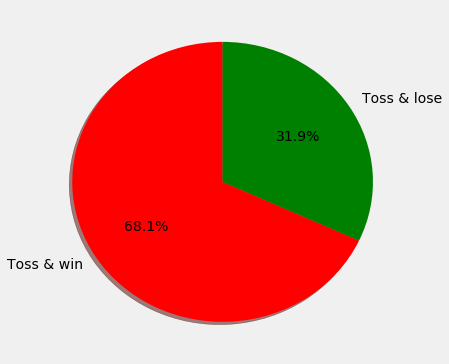

In [59]:
#okay from the above prediction on features, we notice toss winner has least chances of winning matches
#but does the current stats shows the same result
#df.count --> 577 rows
#Previously toss_winners were about 50.4%, with 2017 IPL season, it has reached 56.7%. As data matures, so does
# the changes in the predictions
import matplotlib.pyplot as mlt
mlt.style.use('fivethirtyeight')
df_fil=df[df['toss_winner']==df['winner']]
slices=[len(df_fil),(577-len(df_fil))]
mlt.pie(slices,labels=['Toss & win','Toss & lose'],startangle=90,shadow=True,explode=(0,0),autopct='%1.1f%%',colors=['r','g'])
fig = mlt.gcf()
fig.set_size_inches(6,6)
mlt.show()
# Toss winning does not gaurantee a match win from analysis of current stats and thus 
#prediction feature gives less weightage to that 


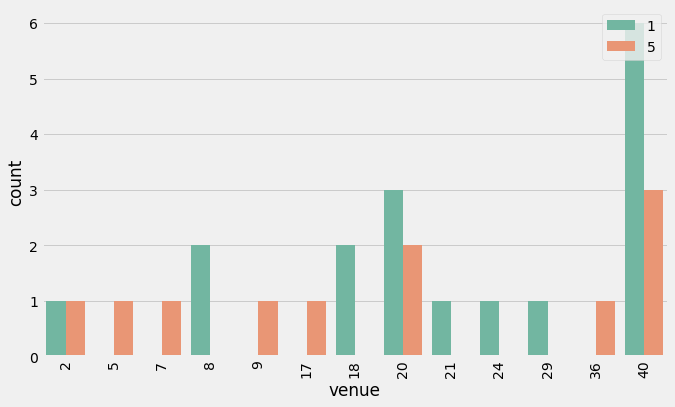

In [60]:
#top 2 team analysis based on number of matches won against each other and how venue affects them?
#Previously we noticed that CSK won 79, RCB won 70 matches
#now let us compare venue against a match between CSK and RCB
#we find that CSK has won most matches against RCB in MA Chidambaram Stadium, Chepauk, Chennai
#RCB has not won any match with CSK in stadiums St George's Park and Wankhede Stadium, but won matches
#with CSK in Kingsmead, New Wanderers Stadium.
#It does prove that chances of CSK winning is more in Chepauk stadium when played against RCB.
# Proves venue is important feature in predictability
import seaborn as sns
team1=dicVal['MI']
team2=dicVal['CSK']
mtemp=matches[((matches['team1']==team1)|(matches['team2']==team1))&((matches['team1']==team2)|(matches['team2']==team2))]
sns.countplot(x='venue', hue='winner',data=mtemp,palette='Set2')
mlt.xticks(rotation='vertical')
leg = mlt.legend( loc = 'upper right')
fig=mlt.gcf()
fig.set_size_inches(10,6)
mlt.show()
#use --> le.classes_[18] to get stadium details

In [61]:
le.classes_[34]

'Sharjah Cricket Stadium'

# Lets get 4 features now. For both teams, Find Average of 
1)Top 5 Batsman's averages + strike rate
2)Bowlers: Average+Strike rate+Economy.
and normalize it


Columns: 
Team1 : Bowl : avg, strike, economy
Team1 : Bat  : avg, strike
Team2 : Bowl : avg, strike, economy
Team2 : Bat  : avg, strike

Total columns= 3+3+2+2=10 columns.
Normalize each column with its max value.
Add column :Bowl_Overall : avg, strike, economy
Add column :Bat_Overall : avg, strike

Total_column=2+2=4 columns


In [251]:
#df_bowl=df_bowl.drop(columns="0")
#df_bat=df_bat.drop(columns="0")

In [252]:
p=df_bat.values
pba=p[:,:22]
pbs=p[:,22:44]

In [253]:
pba=pba/pba.max()
pbs=pbs/pbs.max()

In [254]:
pbat=(pba+pbs)

In [255]:
team1_bat=pbat[:,:11]
team2_bat=pbat[:,11:22]

In [269]:
team1_bat.sort()
team2_bat.sort()
team1_top5_bats=team1_bat[:,-5:]
team2_top5_bats=team2_bat[:,-5:]
team1_bat_strength=team1_top5_bats.sum(axis=1)
team2_bat_strength=team2_top5_bats.sum(axis=1)

In [270]:
team2_bat_strength

array([ 4.74049682,  6.04014592,  4.3420916 ,  5.61743097,  5.21590229,
        4.99217926,  5.34507103,  4.52331121,  4.71892044,  4.67435411,
        4.57472411,  4.74049682,  5.08590381,  5.34507103,  6.04014592,
        4.85173981,  5.49865718,  5.03618003,  4.49436751,  5.48771755,
        4.4074875 ,  4.79191767,  5.48771755,  5.34739288,  4.84398576,
        4.79191767,  4.57472411,  5.34739288,  5.27767541,  4.79191767,
        4.91411629,  4.11805755,  5.32031844,  5.56721033,  5.16067   ,
        5.34739288,  4.79191767,  4.2397728 ,  4.80369267,  5.95665631,
        4.51475257,  5.34739288,  5.32031844,  4.57472411,  4.83234566,
        5.73348659,  4.61519263,  4.86009258,  4.45403217,  5.95327038,
        4.95440941,  4.82403299,  5.44864568,  4.7612331 ,  4.54378606,
        4.57472411,  4.92204874,  4.33242127,  4.89885225,  4.26372363,
        5.15194266,  5.01051447,  5.78894107,  5.3903347 ,  4.56610369,
        5.23129928,  4.49659558,  5.15194266,  4.89885225,  5.23

In [271]:
p=df_bowl.values
pba=p[:,:22]
pbs=p[:,22:44]
pbe=p[:,44:66]

In [272]:
pba=pba/pba.max()
pbs=pbs/pbs.max()
pbe=pbe/pbe.max()

In [273]:
pba[pba==0]=1
pbs[pbs==0]=1
pbe[pbe==0]=1

In [275]:
pbowl=(pba+pbs+pbe)

In [276]:
team1_bowl=pbowl[:,:11]
team2_bowl=pbowl[:,11:22]

In [291]:
team1_bowl.sort()
team2_bowl.sort()
team1_top5_bowlers=team1_bowl[:,:5]
team2_top5_bowlers=team2_bowl[:,:5]
team1_bowl_strength=team1_top5_bowlers.sum(axis=1)
team2_bowl_strength=team2_top5_bowlers.sum(axis=1)

In [292]:
max1=team1_bat_strength.max()
max2=team2_bat_strength.max()
max_bat=max(max1,max2)
max3=team1_bowl_strength.max()
max4=team2_bowl_strength.max()
max_bowl=max(max3,max4)

team1_bat_strength=team1_bat_strength/max_bat
team2_bat_strength=team2_bat_strength/max_bat
team1_bowl_strength=team1_bowl_strength/max_bowl
team2_bowl_strength=team2_bowl_strength/max_bowl

t1bs=team1_bat_strength
t2bs=team2_bat_strength
t1bos=team1_bowl_strength
t2bos=team2_bowl_strength

In [293]:
#Create dataframe for these 4 columns and eventually merge them
d = {'t1as': t1bs, 't2as': t2bs,"t1bos":t1bos,"t2bos":t2bos}
df_players=pd.DataFrame(data=d)

In [294]:
df_players.head()

,t1as,t1bos,t2as,t2bos
0,0.903277,0.825236,0.772229,0.826225
1,0.828482,0.862043,0.983943,0.802755
2,0.802261,0.809254,0.707329,0.771397
3,0.741297,0.771154,0.915082,0.824158
4,0.772229,0.826225,0.849673,0.812632


In [299]:
df_new = pd.concat([df, df_players],axis=1)

In [303]:
df_new.head()

,team1,team2,city,toss_decision,toss_winner,venue,winner,t1as,t1bos,t2as,t2bos
0,10,3,15,1,3,28,10,0.903277,0.825236,0.772229,0.826225
1,1,11,27,1,11,21,11,0.828482,0.862043,0.983943,0.802755
2,8,2,29,1,2,31,2,0.802261,0.809254,0.707329,0.771397
3,11,9,16,1,9,13,9,0.741297,0.771154,0.915082,0.824158
4,3,7,2,0,3,17,3,0.772229,0.826225,0.849673,0.812632


In [304]:
df_new_backup=df_new.copy(deep=True)

In [310]:
df_new.drop(labels="toss_decision",axis=1,inplace=True)

In [323]:
model = RandomForestClassifier(n_estimators=100)
outcome_var = ['winner']
predictor_var = ['team1', 'team2', 'venue', 'toss_winner','city','t1as','t1bos','t2as','t2bos']
classification_model(model, df_new,predictor_var,outcome_var)

/home/jeevan/.local/lib/python3.5/site-packages/ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':
/home/jeevan/.local/lib/python3.5/site-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Accuracy : 100.000%


/home/jeevan/.local/lib/python3.5/site-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/home/jeevan/.local/lib/python3.5/site-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/home/jeevan/.local/lib/python3.5/site-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/home/jeevan/.local/lib/python3.5/site-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/home/jeevan/.local/lib/python3.5/site-packages/ipykernel_launcher.py:21: DataConver

Cross-Validation Score : 54.365%


/home/jeevan/.local/lib/python3.5/site-packages/ipykernel_launcher.py:26: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [313]:
model = RandomForestClassifier(n_estimators=100)
outcome_var = ['winner']
predictor_var = ['team1', 'team2', 'venue', 'toss_winner','city']
classification_model(model, df_new,predictor_var,outcome_var)

/home/jeevan/.local/lib/python3.5/site-packages/ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':
/home/jeevan/.local/lib/python3.5/site-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Accuracy : 87.963%


/home/jeevan/.local/lib/python3.5/site-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/home/jeevan/.local/lib/python3.5/site-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/home/jeevan/.local/lib/python3.5/site-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/home/jeevan/.local/lib/python3.5/site-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/home/jeevan/.local/lib/python3.5/site-packages/ipykernel_launcher.py:21: DataConver

Cross-Validation Score : 51.852%


/home/jeevan/.local/lib/python3.5/site-packages/ipykernel_launcher.py:26: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [324]:
model.feature_importances_

array([ 0.12691535,  0.16165628,  0.09564358,  0.11726927,  0.08760579,
        0.10409969,  0.10396339,  0.10169553,  0.10115111])